In [4]:
import pandas as pd
pd.set_option('display.max_columns', 25)

In [6]:
inspect = pd.read_excel('97_sample_tj.xlsx')
inspect.sample(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
87,VWWN485B8S19BH,565431772831,flazz,"Azalea Setiawan, S.E.",F,2007,10D,Kampung Rambutan - Tanjung Priok,1,NaN,Kampung Rambutan,-6.309885,106.88216,0,2023-04-13 16:46:11,P00241,Sunter Kelapa Gading Arah Utara,-6.142900,106.89076,12.0,2023-04-13 17:41:52,3500.0
54,HXBY309N8D48JT,3507107976417837,dki,Gatra Rahayu,M,1946,6V,Ragunan - Gelora Bung Karno,0,P00053,Duren Tiga,-6.252377,106.82697,8,2023-04-17 06:03:16,P00133,Masjid Agung,-6.236483,106.79845,13.0,2023-04-17 07:00:03,3500.0
10,NYOJ262H9B02AG,4951106743101541,dki,Dr. Ulva Mandala,M,1973,4E,Rusun Jatinegara Kaum - Pulo Gadung,1,B02670P,Ps. Pulo Gadung 1,-6.187336,106.90597,3,2023-04-17 18:17:39,B01730P,Jatinegara Kaum Raya Bekasi,-6.203351,106.90407,7.0,2023-04-17 20:15:52,0.0
52,FUJB426M8J57TQ,676379677179,flazz,"Jamalia Rahmawati, M.Farm",M,1951,M7,Kampung Rambutan - Monas,1,P00018,BNN Arah Barat,-6.246510,106.87318,17,2023-04-21 09:26:50,NaN,Cawang UKI,-6.250309,106.87360,18.0,2023-04-21 11:15:22,3500.0
89,KHBW997R7P66CY,4997693930906134528,brizzi,"Cahyo Hutagalung, S.Pt",M,1989,JAK.06,Kampung Rambutan - Pondok Gede,1,B02029P,Komplek Dirgantara III Halim PK,-6.284809,106.90458,48,2023-04-20 16:17:47,B02929P,Pondok Molek,-6.284344,106.90862,50.0,2023-04-20 17:20:19,0.0


In [7]:
inspect.isnull().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          4
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         7
tapOutStopsName     3
tapOutStopsLat      3
tapOutStopsLon      3
stopEndSeq          3
tapOutTime          3
payAmount           3
dtype: int64

In [8]:
inspect[(inspect['tapOutStopsLat'].isnull() == True) & (inspect['tapOutStopsLon'].isnull() == True)]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32,LWQD332E1J99RO,4708295371136584,dki,Vega Putra,F,2000,2P,Gondangdia - Senen,1,B00083P,Atrium 1,-6.177759,106.84120,6,2023-04-20 06:15:53,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
47,ADOX083D6B70TR,6011596915345442,dki,Atmaja Nababan,M,2008,JAK.08,Roxy - Benhil,0,B00816P,ITC Roxy,-6.167370,106.80248,0,2023-04-27 20:20:52,NaN,NaN,NaN,NaN,NaN,NaN,0.0
53,OZXI750Y7U49PR,4489337334208780800,brizzi,Irma Nababan,M,2003,10D,Kampung Rambutan - Tanjung Priok,1,NaN,Permai Koja Arah Utara,-6.114130,106.89309,15,2023-04-06 09:37:44,NaN,NaN,NaN,NaN,NaN,NaN,3500.0


In [10]:
inspect.drop(index=[32,47,53], inplace=True)

In [12]:
inspect['payAmount'].fillna(inspect['payAmount'].median(), inplace=True)

C:\Users\raymo\AppData\Local\Temp\ipykernel_18244\4197659088.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inspect['payAmount'].fillna(inspect['payAmount'].median(), inplace=True)


In [29]:
inspect[(inspect['tapInStops'].isna()) | (inspect['tapOutStops'].isna())]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
8,CBWV092K1T46TO,676264221174,flazz,"T. Damar Suwarno, M.Pd",F,1991,M13,Puri Beta 2 - Tendean,1,NaN,Seskoal,-6.238064,106.77121,6,2023-04-14 20:39:05,P00001,Adam Malik,-6.236466,106.74786,10.0,2023-04-14 21:47:55,3500.0
36,WUNU555A4U56AI,3579692870866695,dki,"Endra Nababan, M.Farm",F,2011,4D,Pulo Gadung 2 - Kuningan,1,NaN,Kuningan Madya,-6.213410,106.83050,4,2023-04-07 06:09:07,P00188,Pramuka BPKP,-6.192192,106.87401,13.0,2023-04-07 06:56:03,3500.0
45,ZDRS301X4J09PG,30240183284849,bni,drg. Ellis Gunawan,F,2006,2E,Rusun Rawa Bebek - Kodamar,1,B00823P,Jagal 2,-6.190792,106.93472,12,2023-04-15 13:14:33,NaN,Walikota Jakarta Timur 1,-6.212327,106.94515,23.0,2023-04-15 14:48:46,0.0
52,FUJB426M8J57TQ,676379677179,flazz,"Jamalia Rahmawati, M.Farm",M,1951,M7,Kampung Rambutan - Monas,1,P00018,BNN Arah Barat,-6.246510,106.87318,17,2023-04-21 09:26:50,NaN,Cawang UKI,-6.250309,106.87360,18.0,2023-04-21 11:15:22,3500.0
56,XTGC774Z4Y96BS,4490538004709364,dki,Ajeng Pradipta,M,1975,10,Tanjung Priok - PGC 2,1,P00232,Stasiun Jatinegara Arah Utara,-6.215420,106.87420,7,2023-04-28 05:59:09,NaN,Permai Koja Arah Utara,-6.114130,106.89309,19.0,2023-04-28 06:27:10,3500.0
87,VWWN485B8S19BH,565431772831,flazz,"Azalea Setiawan, S.E.",F,2007,10D,Kampung Rambutan - Tanjung Priok,1,NaN,Kampung Rambutan,-6.309885,106.88216,0,2023-04-13 16:46:11,P00241,Sunter Kelapa Gading Arah Utara,-6.142900,106.89076,12.0,2023-04-13 17:41:52,3500.0
92,ZADQ516V4H52BM,587887634588,flazz,Drs. Harjo Nurdiyanti,M,1986,14,Jakarta International Stadium - Senen,0,B00292P,Danau Agung 1,-6.147281,106.85820,8,2023-04-28 06:49:00,NaN,Honda Letjen Suprapto,-6.174933,106.84973,16.0,2023-04-28 07:21:56,3500.0


In [ ]:
inspect.isnull().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          3
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         4
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

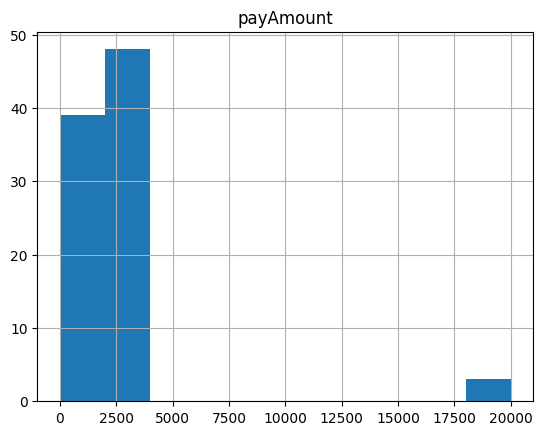

In [ ]:
inspect.hist('payAmount');

In [30]:
inspect.to_excel('97_sample_tj.xlsx', index=False)